In [154]:
import pandas as pd
# pd.options.display.max_columns=None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)
# tf.random.set_seed(42)
from sklearn.model_selection import train_test_split
from skmultilearn.model_selection.measures import get_combination_wise_output_matrix
from sklearn.model_selection import GroupKFold

In [52]:
data = pd.read_excel('../latest.xlsx',engine='openpyxl')

In [53]:
data.columns.tolist()

['start',
 'end',
 'Radiologist',
 'Patient Number',
 'Age',
 'Gender',
 'Is the patient pregnant',
 'Date-Time',
 'District',
 'Does the patient have any symptoms',
 'Upper Posterior (Longitudinal)',
 'Findings for Upper Posterior (Longitudinal)',
 'Findings for Upper Posterior (Longitudinal)/Normal',
 'Findings for Upper Posterior (Longitudinal)/>3 B-lines',
 'Findings for Upper Posterior (Longitudinal)/Consolidation',
 'Findings for Upper Posterior (Longitudinal)/Effusion',
 'Findings for Upper Posterior (Longitudinal)/Other',
 'If Other',
 'Upper Posterior (Transverse)',
 'Findings for Upper Posterior (Transverse)',
 'Findings for Upper Posterior (Transverse)/Normal',
 'Findings for Upper Posterior (Transverse)/> 3 B-lines',
 'Findings for Upper Posterior (Transverse)/Consolidation',
 'Findings for Upper Posterior (Transverse)/Effusion',
 'Findings for Upper Posterior (Transverse)/Other',
 'If Other.1',
 'Lower Posterior (Longitudinal)',
 'Findings for Lower Posterior (Longitudinal

In [54]:
data['Is the patient pregnant'].value_counts()

No    24
Name: Is the patient pregnant, dtype: int64

In [55]:
data['Is the patient pregnant']=data['Is the patient pregnant'].fillna('Not filled')

<AxesSubplot:xlabel='Is the patient pregnant', ylabel='count'>

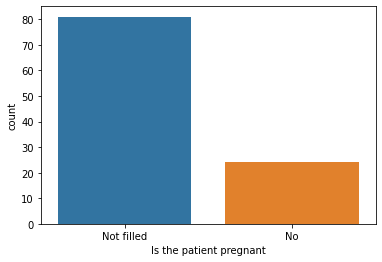

In [56]:
sns.countplot(x='Is the patient pregnant',data=data)

Text(0.5, 1.0, 'Contribution of Radiologits')

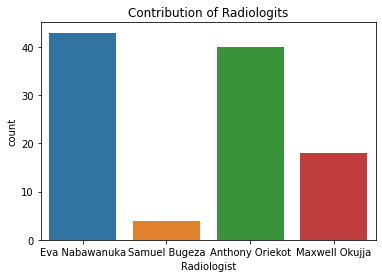

In [57]:
sns.countplot(x='Radiologist',data=data)
plt.title("Contribution of Radiologits")

Text(0.5, 1.0, 'Gender Distribution')

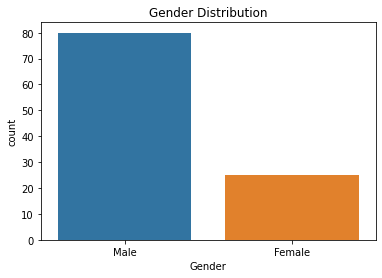

In [58]:
sns.countplot(x='Gender',data=data)
plt.title("Gender Distribution")

Text(0.5, 0, 'Age')

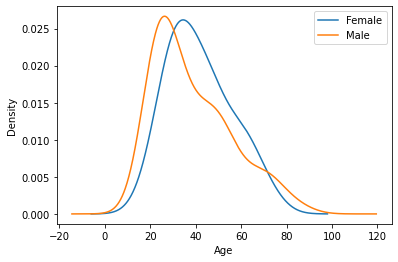

In [59]:
data.groupby('Gender').Age.plot(kind='kde')
plt.legend(['Female','Male'])
plt.xlabel('Age')

Text(0.5, 1.0, 'Male Distribution')

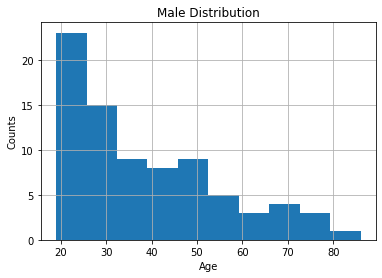

In [60]:
data[data['Gender']=='Male'].Age.hist()
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Male Distribution')

In [61]:
data = data.drop(columns=['start',
                   'end',
                   'Radiologist',
                   'Age',
                   'Gender',
                   'Is the patient pregnant',
                   'Does the patient have any symptoms',
                   'Date-Time',
                   'District',
                    '__version__',
                     '_version_',
                     '_version__001',
                     '_version__002',
                     '_id',
                     '_uuid',
                     '_submission_time',
                     '_validation_status',
                     '_notes',
                     '_status',
                     '_submitted_by',
                     '_tags',
                     '_index'             
                  ])

In [62]:
data

,Patient Number,Upper Posterior (Longitudinal),Findings for Upper Posterior (Longitudinal),Findings for Upper Posterior (Longitudinal)/Normal,Findings for Upper Posterior (Longitudinal)/>3 B-lines,Findings for Upper Posterior (Longitudinal)/Consolidation,Findings for Upper Posterior (Longitudinal)/Effusion,Findings for Upper Posterior (Longitudinal)/Other,If Other,Upper Posterior (Transverse),...,Lower Lateral (Transverse).1,Findings for Lower Lateral( Transverse),Findings for Lower Lateral( Transverse)/Normal,Findings for Lower Lateral( Transverse)/>3 B-lines,Findings for Lower Lateral( Transverse)/Consolidation,Findings for Lower Lateral( Transverse)/Effusion,Findings for Lower Lateral( Transverse)/Other,If Other.23,Conclusion,Comments
0,COAST-055,RT UPPER POST LONG-22_52_9.jpg,Normal,NaN,NaN,NaN,NaN,NaN,NaN,220203_150107-22_53_53.jpg,...,LEFT LOWER TRANS-23_24_32.jpg,Normal,NaN,NaN,NaN,NaN,NaN,NaN,Healthy Lung,NaN
1,COAST/052,RT POST UPPER LONG-3_45_58.jpg,Other,0.0,0.0,0.0,0.0,1.0,PLEURAL THICKENING,RT POST UPPER TRANS-3_46_28.jpg,...,LEFT LAT LOWER TRANS-4_24_25.jpg,Normal,1.0,0.0,0.0,0.0,0.0,NaN,Probably Covid,NaN
2,COAST-053,Rt post upper trans-22_36_3.png,Normal,1.0,0.0,0.0,0.0,0.0,NaN,Rt post upper trans-22_36_23.png,...,Left lat lower trans-22_44_8.png,Normal,1.0,0.0,0.0,0.0,0.0,NaN,Healthy Lung,NaN
3,COAST-056,rt upper post long-22_59_57.png,>3 B-lines Consolidation,0.0,1.0,1.0,0.0,0.0,NaN,rt upper post trans-23_0_45.png,...,left lat lower trans-23_17_58.png,Consolidation,0.0,0.0,1.0,0.0,0.0,NaN,Diseased lung but probably Not Covid,Most likely Pulmonary Tuberculosis
4,COAST-055,RT UPPER POST LONG-9_18_29.jpg,Normal,1.0,0.0,0.0,0.0,0.0,NaN,RT UPPER POST TRANS-9_21_19.jpg,...,LEFT LOWER TRANS-10_13_3.jpg,Normal,1.0,0.0,0.0,0.0,0.0,NaN,Diseased lung but probably Not Covid,CONSOLIDATION PNEUMONIA RT LOWER LATERAL REGION.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,COAST 119,RT POST UPPER LONG-15_48_23.jpeg,Normal,1.0,0.0,0.0,0.0,0.0,NaN,RT POST UPPER TRANS-15_48_32.jpeg,...,LT LAT LOWER TRANS-15_52_32.jpeg,Effusion,0.0,0.0,0.0,1.0,0.0,NaN,Diseased lung but probably Not Covid,NaN
101,COAST 120,RT POST UPPER LONG-15_59_52.jpeg,Normal,1.0,0.0,0.0,0.0,0.0,NaN,RT POST UPPER TRANS-16_0_0.jpeg,...,LT LAT LOWER TRANS-16_5_3.jpeg,Effusion,0.0,0.0,0.0,1.0,0.0,NaN,Diseased lung but probably Not Covid,PTB is likely
102,COAST 121,RT POST UPPER LONG-16_12_56.jpeg,Normal,1.0,0.0,0.0,0.0,0.0,NaN,RT POST UPPER TRANS-16_13_4.jpeg,...,LT LAT LOWER TRANS-16_17_56.jpeg,Consolidation,0.0,0.0,1.0,0.0,0.0,NaN,Diseased lung but probably Not Covid,PTB is likely
103,COAST 122,RT POST UPPER LONG-16_25_56.jpeg,Normal,1.0,0.0,0.0,0.0,0.0,NaN,RT POST UPPER TRANS-16_26_3.jpeg,...,LT LAT LOWER TRANS-16_31_47.jpeg,Normal,1.0,0.0,0.0,0.0,0.0,NaN,Probably Covid,NaN


In [63]:
data.iloc[:,1:9].columns.tolist()

['Upper Posterior (Longitudinal)',
 'Findings for Upper Posterior (Longitudinal)',
 'Findings for Upper Posterior (Longitudinal)/Normal',
 'Findings for Upper Posterior (Longitudinal)/>3 B-lines',
 'Findings for Upper Posterior (Longitudinal)/Consolidation',
 'Findings for Upper Posterior (Longitudinal)/Effusion',
 'Findings for Upper Posterior (Longitudinal)/Other',
 'If Other']

In [29]:
# data.iloc[:,(np.arange(4,9)+8*2)].sum(axis=0)

Findings for Lower Posterior (Longitudinal)/Normal           74.0
Findings for Lower Posterior (Longitudinal)/> 3 B-lines      10.0
Findings for Lower Posterior (Longitudinal)/Consolidation    15.0
Findings for Lower Posterior (Longitudinal)/Effusion          4.0
Findings for Lower Posterior (Longitudinal)/Other             7.0
dtype: float64

In [64]:
# for i in range(24):
#     data.iloc[:,(np.arange(4,9)+8*i).tolist()].sum(axis=0).plot.barh()
#     plt.show()

In [113]:
train=[]
for i in range(24):
    train.append(data.iloc[:,(np.arange(1,9)+8*i).tolist()].values)
    

In [114]:
train = pd.DataFrame(np.vstack(train))

In [115]:
train.columns=['image','Findings','Normal','>3 B-lines','Consolidation','Effusion','Other','If Other']

In [116]:
train['Patient Number']=data['Patient Number'].values.tolist()*24

In [117]:
train=train.drop(columns=['If Other','Other'])

In [122]:
train

,image,Findings,Normal,>3 B-lines,Consolidation,Effusion,Patient Number
0,RT UPPER POST LONG-22_52_9.jpg,Normal,NaN,NaN,NaN,NaN,COAST-055
1,RT POST UPPER LONG-3_45_58.jpg,Other,0.0,0.0,0.0,0.0,COAST/052
2,Rt post upper trans-22_36_3.png,Normal,1.0,0.0,0.0,0.0,COAST-053
3,rt upper post long-22_59_57.png,>3 B-lines Consolidation,0.0,1.0,1.0,0.0,COAST-056
4,RT UPPER POST LONG-9_18_29.jpg,Normal,1.0,0.0,0.0,0.0,COAST-055
...,...,...,...,...,...,...,...
2515,LT LAT LOWER TRANS-15_52_32.jpeg,Effusion,0.0,0.0,0.0,1.0,COAST 119
2516,LT LAT LOWER TRANS-16_5_3.jpeg,Effusion,0.0,0.0,0.0,1.0,COAST 120
2517,LT LAT LOWER TRANS-16_17_56.jpeg,Consolidation,0.0,0.0,1.0,0.0,COAST 121
2518,LT LAT LOWER TRANS-16_31_47.jpeg,Normal,1.0,0.0,0.0,0.0,COAST 122


In [127]:
train=train.dropna()

In [136]:
train=train.reset_index().drop(columns='index')
train

,image,Findings,Normal,>3 B-lines,Consolidation,Effusion,Patient Number
0,RT POST UPPER LONG-3_45_58.jpg,Other,0.0,0.0,0.0,0.0,COAST/052
1,Rt post upper trans-22_36_3.png,Normal,1.0,0.0,0.0,0.0,COAST-053
2,rt upper post long-22_59_57.png,>3 B-lines Consolidation,0.0,1.0,1.0,0.0,COAST-056
3,RT UPPER POST LONG-9_18_29.jpg,Normal,1.0,0.0,0.0,0.0,COAST-055
4,Rt post long-21_51_58.png,Consolidation,0.0,0.0,1.0,0.0,COAST-054
...,...,...,...,...,...,...,...
2474,LT LAT LOWER TRANS-15_52_32.jpeg,Effusion,0.0,0.0,0.0,1.0,COAST 119
2475,LT LAT LOWER TRANS-16_5_3.jpeg,Effusion,0.0,0.0,0.0,1.0,COAST 120
2476,LT LAT LOWER TRANS-16_17_56.jpeg,Consolidation,0.0,0.0,1.0,0.0,COAST 121
2477,LT LAT LOWER TRANS-16_31_47.jpeg,Normal,1.0,0.0,0.0,0.0,COAST 122


Text(0.5, 1.0, 'Distribution of Artifacts')

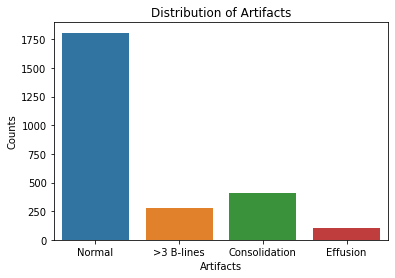

In [180]:
sns.barplot(x=['Normal','>3 B-lines','Consolidation','Effusion'],y=train[['Normal','>3 B-lines','Consolidation','Effusion']].sum(axis=0).tolist())
plt.xlabel('Artifacts')
plt.ylabel("Counts")
plt.title("Distribution of Artifacts")

In [184]:
groups=train['Patient Number'].values.tolist()
train['group_kfold'] = -1
group_kfold = GroupKFold(n_splits=5)
X=train.image.values
y=train[['Normal','>3 B-lines','Consolidation','Effusion']].values
for i,(train_index, test_index) in enumerate(group_kfold.split(X, y, groups)):
    train.loc[test_index,'group_kfold']=i
    

In [198]:
train[train.group_kfold==4][['Normal','>3 B-lines','Consolidation','Effusion']].sum(axis=0).tolist()

[335.0, 49.0, 89.0, 24.0]

<AxesSubplot:xlabel='count', ylabel='Conclusion'>

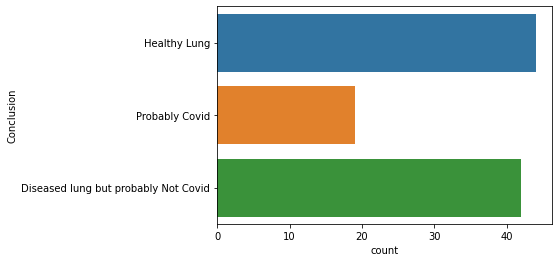

In [186]:
sns.countplot(y='Conclusion',data=data) # patients with covid

In [ ]:
sns.count

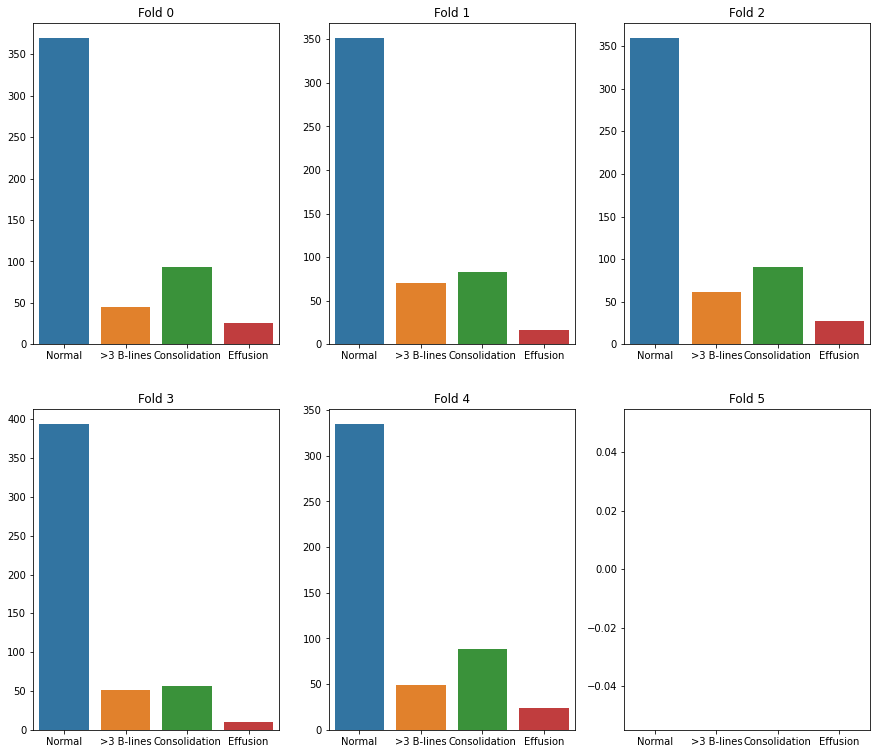

In [192]:
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(15,13))
artifacts = ['Normal','>3 B-lines','Consolidation','Effusion','Other']
a=0
for row in range(2):
    for col in range(3):
        if a>5:break
        y=train[train.group_kfold==a][['Normal','>3 B-lines','Consolidation','Effusion']].sum(axis=0).tolist()
        sns.barplot(ax=axes[row,col],x =['Normal','>3 B-lines','Consolidation','Effusion'],y=y)
        axes[row,col].set_title("Fold {}".format(a))   
        a+=1
        
        

In [219]:
testset=train[train.group_kfold==4].reset_index()
testset.to_csv('testset.csv',index=False)

In [220]:
trainset=train[train.group_kfold!=4].reset_index()
trainset.to_csv('trainset.csv',index=False)

In [221]:
trainset

,index,image,Findings,Normal,>3 B-lines,Consolidation,Effusion,Patient Number,group_kfold
0,1,Rt post upper trans-22_36_3.png,Normal,1.0,0.0,0.0,0.0,COAST-053,1
1,2,rt upper post long-22_59_57.png,>3 B-lines Consolidation,0.0,1.0,1.0,0.0,COAST-056,2
2,3,RT UPPER POST LONG-9_18_29.jpg,Normal,1.0,0.0,0.0,0.0,COAST-055,2
3,5,1646466936258.png,>3 B-lines,0.0,1.0,0.0,0.0,COAST-017,3
4,6,image_3883381118076-9_12_17.png,Normal,1.0,0.0,0.0,0.0,COAST-002,3
...,...,...,...,...,...,...,...,...,...
1995,2473,LT LAT LOWER TRANS-16_19_46.jpeg,Consolidation,0.0,0.0,1.0,0.0,COAST 118,3
1996,2474,LT LAT LOWER TRANS-15_52_32.jpeg,Effusion,0.0,0.0,0.0,1.0,COAST 119,0
1997,2475,LT LAT LOWER TRANS-16_5_3.jpeg,Effusion,0.0,0.0,0.0,1.0,COAST 120,1
1998,2477,LT LAT LOWER TRANS-16_31_47.jpeg,Normal,1.0,0.0,0.0,0.0,COAST 122,2
